In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
Retail_df=pd.read_excel ("retailer_data_finalfinal.xlsx")


In [ ]:
df["data"]=df["InvoiceDate"].astype(str)+" "+df["InvoiceTime"].astype(str)

In [ ]:
df.data

0         2011-12-09 09:15:00
1         2011-01-18 10:01:00
2         2011-10-27 12:26:00
3         2011-05-27 10:52:00
4         2011-02-22 10:43:00
                 ...         
527798    2011-12-09 12:20:00
527799    2011-12-09 12:20:00
527800    2011-12-09 12:20:00
527801    2011-12-09 12:20:00
527802    2011-12-09 12:20:00
Name: data, Length: 527803, dtype: object

In [ ]:
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Subtotal,CustomerID,Country,data
0,581483,2011-12-09,09:15:00,23843,中興米外銷日本之米(圓ㄧ)3Kg,285,149,42465,16446,United Kingdom,2011-12-09 09:15:00
1,541431,2011-01-18,10:01:00,23166,樂米穀場花東自然農耕特哉鮮白米(圓二)1.5K,272,189,51408,12346,United Kingdom,2011-01-18 10:01:00
2,573008,2011-10-27,12:26:00,84077,一匙靈Attack抗菌EX洗衣精補充-1.5Kg,69,79,5451,12901,United Kingdom,2011-10-27 12:26:00
3,554868,2011-05-27,10:52:00,22197,鴻津太國捲(蛋奶素)-370g,66,88,5808,13135,United Kingdom,2011-05-27 10:52:00
4,544612,2011-02-22,10:43:00,22053,家樂福義大利濃縮濾泡式咖啡粉,62,99,6138,18087,United Kingdom,2011-02-22 10:43:00


In [ ]:
#Convert the date in YYYY-mm-dd HH:MM format and store that date in 'Date' column
Retail_df['Date']=pd.to_datetime(Retail_df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')
#Retail_df['Date']=Retail_df['Date'].apply(lambda x: x.strftime('%Y-%d-%m %H:%M'))

# Count the unique no of attributes in Retail data
def unique_counts(Retail_df):
    for i in Retail_df.columns:
        count = Retail_df[i].nunique()
        print(i, ": ", count)
unique_counts(Retail_df)

InvoiceNo :  19786
InvoiceDate :  305
InvoiceTime :  740
StockCode :  3914
Description :  3914
Quantity :  56
UnitPrice :  637
Subtotal :  2890
CustomerID :  5708
Country :  38
Date :  305


In [ ]:
Retail_df['Total_Price']=Retail_df['Quantity']*Retail_df['UnitPrice']
Retail_df.head(10)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Subtotal,CustomerID,Country,Date,Total_Price
0,581483,2011-12-09,09:15:00,23843,中興米外銷日本之米(圓ㄧ)3Kg,285,149,42465,16446,United Kingdom,2011-12-09,42465
1,541431,2011-01-18,10:01:00,23166,樂米穀場花東自然農耕特哉鮮白米(圓二)1.5K,272,189,51408,12346,United Kingdom,2011-01-18,51408
2,573008,2011-10-27,12:26:00,84077,一匙靈Attack抗菌EX洗衣精補充-1.5Kg,69,79,5451,12901,United Kingdom,2011-10-27,5451
3,554868,2011-05-27,10:52:00,22197,鴻津太國捲(蛋奶素)-370g,66,88,5808,13135,United Kingdom,2011-05-27,5808
4,544612,2011-02-22,10:43:00,22053,家樂福義大利濃縮濾泡式咖啡粉,62,99,6138,18087,United Kingdom,2011-02-22,6138
5,560599,2011-07-19,17:04:00,18007,沙威隆抗菌潔淨沐浴乳茶樹精油,56,149,8344,14609,United Kingdom,2011-07-19,8344
6,540815,2011-01-11,12:55:00,21108,泡舒洗潔精補充包-檸檬-800g,56,59,3304,15749,United Kingdom,2011-01-11,3304
7,550461,2011-04-18,13:20:00,21108,泡舒洗潔精補充包-檸檬-800g,56,59,3304,15749,United Kingdom,2011-04-18,3304
8,573995,2011-11-02,11:24:00,16014,家樂福藍莓優格-100gx2,55,24,1320,16308,United Kingdom,2011-11-02,1320
9,536830,2010-12-02,17:38:00,84077,一匙靈Attack抗菌EX洗衣精補充-1.5Kg,54,79,4266,16754,United Kingdom,2010-12-02,4266


In [ ]:
Online_retail_df = Retail_df[np.isfinite(Retail_df['CustomerID'])]

In [ ]:
unique_counts(Online_retail_df)

InvoiceNo :  19786
InvoiceDate :  305
InvoiceTime :  740
StockCode :  3914
Description :  3914
Quantity :  56
UnitPrice :  637
Subtotal :  2890
CustomerID :  5708
Country :  38
Date :  305
Total_Price :  2890


In [ ]:
#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
final_retail = Online_retail_df[Online_retail_df['Quantity'] > 0]

In [ ]:
final_retail.shape

(527803, 12)

In [ ]:
unique_counts(final_retail)

InvoiceNo :  19786
InvoiceDate :  305
InvoiceTime :  740
StockCode :  3914
Description :  3914
Quantity :  56
UnitPrice :  637
Subtotal :  2890
CustomerID :  5708
Country :  38
Date :  305
Total_Price :  2890


In [ ]:
type(final_retail['Date'].max())

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
final_retail['Date'].min()

Timestamp('2010-12-01 00:00:00')

In [ ]:
#Calculate RFM value of each customer
# Assumption: In this final dataset , 
# I have removed all the transaction with negative quantity value

In [ ]:
#Calculate recency and frequency
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [ ]:
rfmTable = final_retail.groupby('CustomerID').agg({'Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
rfmTable['Date'] = rfmTable['Date'].astype(int)
rfmTable.rename(columns={'Date': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [ ]:
#rfmTable = pd.merge(mTable, rfTable, on="CustomerID",how = 'inner')
rfmTable.shape

(5708, 3)

In [ ]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
1,374,526,328673
2,374,2,839
3,374,1,2598
4,374,2,388
5,374,591,372726
6,374,6,1911
7,373,11,1970
8,373,15,2495
9,373,19,4352


In [ ]:
# Fing top 10 customers based on frequency and monetary values
# Sorting first on frequency and then on Monetary value
rfmTable.sort_values(['frequency', 'monetary_value'], 
                     ascending=[False, False], inplace=True)

In [ ]:
#Below are top ten customers after sorting
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
17841,2,7838,4896934
14911,2,5589,6082866
14096,5,5095,2637308
12748,1,4580,3457550
14606,2,2698,1921227
15311,1,2379,1758563
14646,2,2060,4541004
13089,3,1818,2468469
13263,2,1673,828289


In [ ]:
# Find optimal number of segments usig dendograms and elbow methods
# Seggregate the brands into 3 segments

In [ ]:
# Normalising the features
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( rfmTable )

In [ ]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

KMeans(n_clusters=3)

In [ ]:
import random
random.seed(9008)
X_sample = np.array(random.sample(X_scaled.tolist(),20))
#type(X_scaled)

In [ ]:
rfmTable["cluster_new"] = clusters.labels_

In [ ]:
rfmTable
type(X_scaled)

numpy.ndarray

In [ ]:
rfmTable.groupby('cluster_new' ).mean()

,recency,frequency,monetary_value
cluster_new,,,
0,253.780010,48.292315,4.248472e+04
1,45.352402,106.854830,9.321775e+04
2,3.727273,3240.818182,3.355062e+06


In [ ]:
#Dendogram built with random samples from X_scaled

In [ ]:
rfmTable.drop( 'cluster_new', axis = 1, inplace = True )

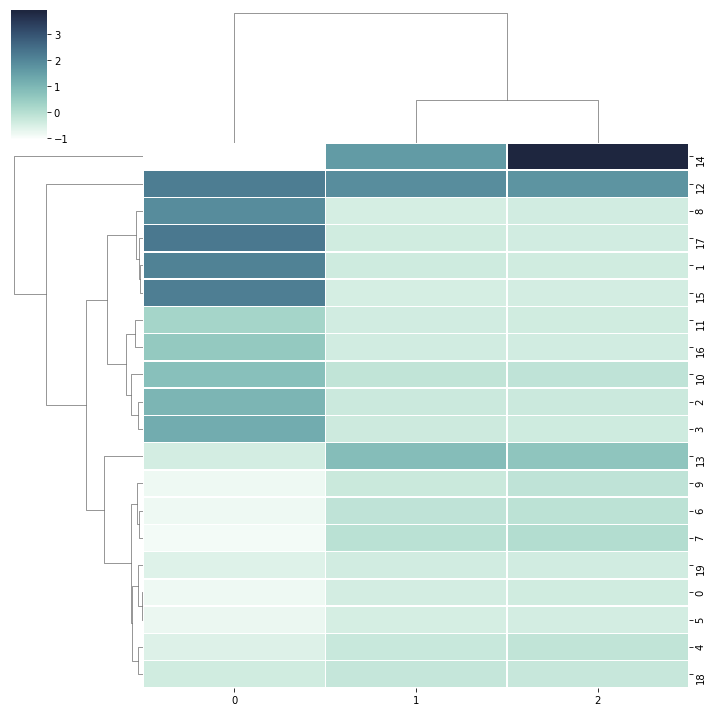

In [ ]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)

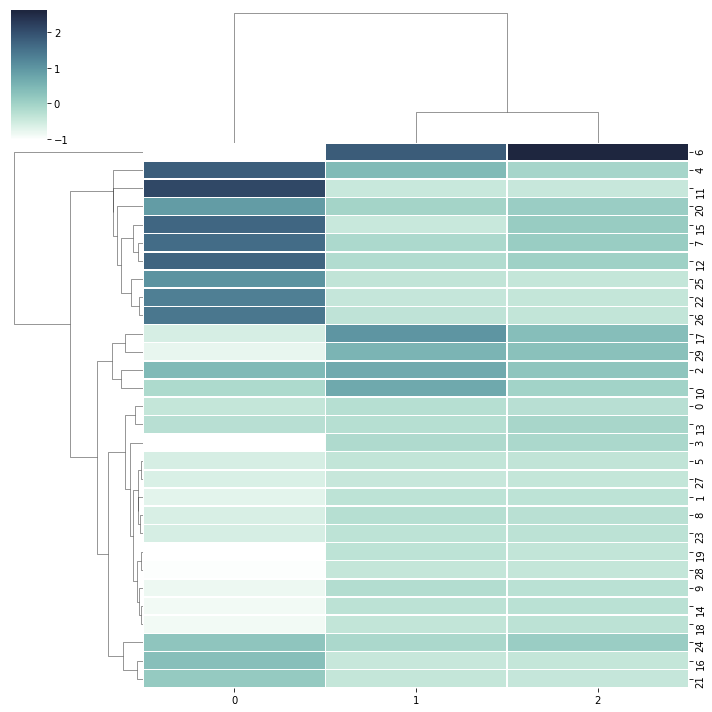

In [ ]:
#Lets take one more sample to validate dendogram
random.seed(9005)
X_sample = np.array(random.sample(X_scaled.tolist(),30))
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)

In [ ]:
# The dendogram shows there are 3-6 disctinct clusters.
# I have taken a random sample of 20-30 data points to build dendogram
# Consider Elbow method to verify the cluster segmentation

In [ ]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,17124.000000
1,2,11652.746070
2,3,6950.963267
3,4,4831.591731
4,5,3714.620181
5,6,3100.756032
6,7,2584.030333
7,8,2295.609852
8,9,2062.751024


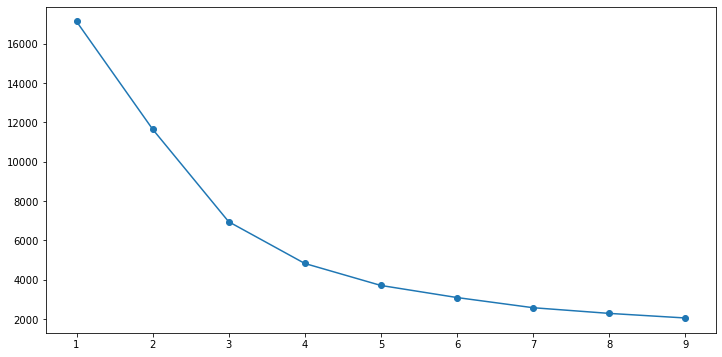

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_errors, marker = "o" )

In [ ]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )
rfmTable["cluster_label"] = clusters.labels_

In [ ]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,3.727273,3240.818182,3.355062e+06
1,45.352402,106.854830,9.321775e+04
2,253.780010,48.292315,4.248472e+04


In [ ]:
rfmTable_0 = rfmTable[rfmTable.cluster_label == 0]

In [ ]:
rfmTable_0.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841,2,7838,4896934,0
14911,2,5589,6082866,0
14096,5,5095,2637308,0
12748,1,4580,3457550,0
14606,2,2698,1921227,0
15311,1,2379,1758563,0
14646,2,2060,4541004,0
13089,3,1818,2468469,0
14298,9,1637,3677701,0


In [ ]:
# All the customers with high recency and low frequency 
# and low monetary value are segmented in this cluster.
# These are the least profitable customers for the company.
rfmTable_1 = rfmTable[rfmTable.cluster_label == 1]
rfmTable_1.head(10)
#Each customer is assigned with the cluster label.

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
13263,2,1673,828289,1
15039,10,1502,729540,1
18118,11,1278,501460,1
14159,20,1203,497457,1
14796,2,1140,914769,1
16033,6,1137,781880,1
15005,16,1118,512785,1
1270,40,1113,760674,1
14056,2,1106,381080,1


In [ ]:
# This cluster has customers that are potential customers 
# with decent frequency and monetary value.
# Company should work towards them to convert them 
# to most profitable customers

rfmTable_2 = rfmTable[rfmTable.cluster_label == 2]
rfmTable_2.head(10)
#Each customer is assigned with the cluster label.

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
30,369,674,642807,2
52,366,650,377512,2
61,365,619,448568,2
37,368,600,417349,2
25,369,596,530847,2
16,372,592,474654,2
5,374,591,372726,2
47,367,590,414687,2
26,369,567,794629,2


In [ ]:
# All the customers with low recency and high frequency and
# monetary value are segmented in 
# this Cluster .These are the most profitable 
# and highly valued customers company should look at.

In [ ]:
rfmTable_0.mean()

recency           3.727273e+00
frequency         3.240818e+03
monetary_value    3.355062e+06
cluster_label     0.000000e+00
dtype: float64

In [ ]:
rfmTable_1.mean()

recency              45.352402
frequency           106.854830
monetary_value    93217.745008
cluster_label         1.000000
dtype: float64

In [ ]:
rfmTable_2.mean()

recency             253.780010
frequency            48.292315
monetary_value    42484.716223
cluster_label         2.000000
dtype: float64

In [ ]:
clusters = KMeans(3)  # 5 clusters
clusters.fit( X_scaled )

KMeans(n_clusters=3)

In [ ]:
rfmTable.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841,2,7838,4896934,0
14911,2,5589,6082866,0
14096,5,5095,2637308,0
12748,1,4580,3457550,0
14606,2,2698,1921227,0
15311,1,2379,1758563,0
14646,2,2060,4541004,0
13089,3,1818,2468469,0
13263,2,1673,828289,1


In [ ]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,3.727273,3240.818182,3.355062e+06
1,45.352402,106.854830,9.321775e+04
2,253.780010,48.292315,4.248472e+04
